## Fashion MNIST image classification with Tensorflow
* Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

* There are 10 classes in Fashion-MNIST: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot.

* Sequential model in tensorflow is created with 5 layers, in which 3 layers are hidden layers for the classification of images with the output of probability distribution over the 10 classes.

## tensorflow_datasets

In [1]:
!pip install -U tensorflow_datasets

In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

In [4]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF4TJPY/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteF4TJPY/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: ",num_train_examples)
print("Number of testing examples: ",num_test_examples)


Number of training examples:  60000
Number of testing examples:  10000


## Helper function for normalization of image

In [7]:
def normalize(images,labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images,labels

In [8]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

## First image of test dataset
* Take a single image and remove the color dimension by reshaping


In [9]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

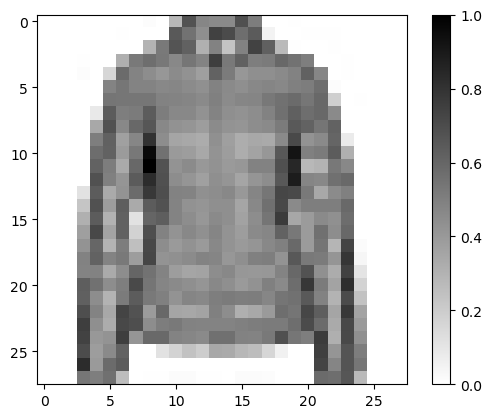

In [10]:
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


## Let's plot first 25 images of test dataset

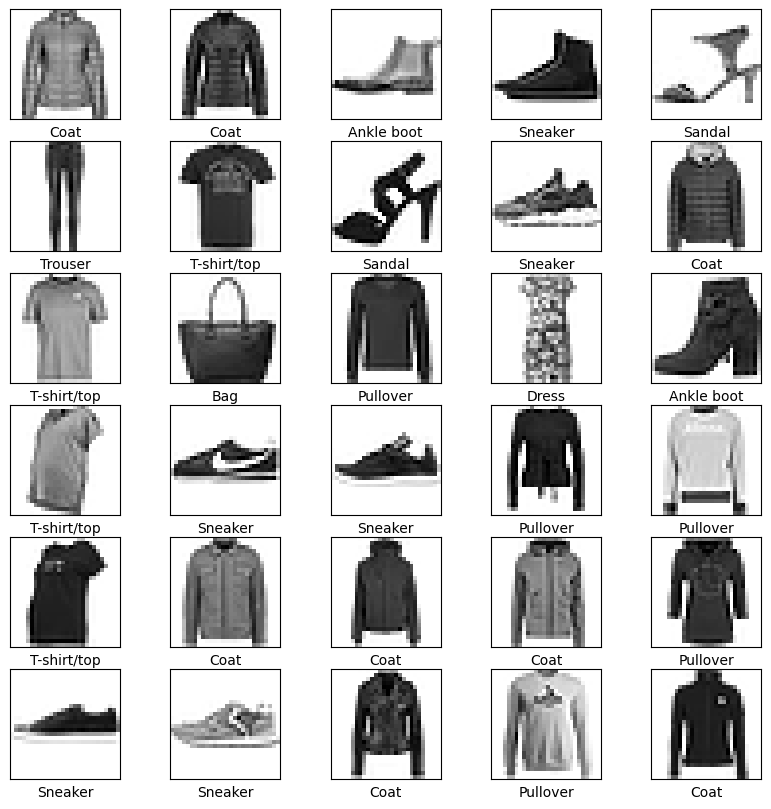

In [11]:
plt.figure(figsize = (10,10))
i =  0
for image,label in test_dataset.take(30):
  image = image.numpy().reshape(28,28)
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap = plt.cm.binary)
  plt.grid(False)
  plt.xlabel(class_names[label])
  i+=1

plt.show()

## Building model with one input layer, 3 hidden layers, and one output layer

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 256, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

## Model compilation

In [13]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Batch division

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Fitting the model

In [15]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 15s 6ms/step - loss: 0.4699 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3593 - accuracy: 0.8680
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3213 - accuracy: 0.8804
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3038 - accuracy: 0.8875
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2764 - accuracy: 0.8967
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2680 - accuracy: 0.8992
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2543 - accuracy: 0.9035
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2431 - accuracy: 0.9073
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2387 - accuracy: 0.9101
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

* Training accuracy -  91.4%

## Test Accuracy

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/BATCH_SIZE))
print(f"Test Loss = {test_loss}, Test Accuracy = {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8864
Test Loss = 0.33890867233276367, Test Accuracy = 0.8863999843597412


* Test accuracy - 89%

## Helper function for plotting images and probability distributions

In [17]:
def plot_images(i,predictions_array,true_labels,images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[...,0], cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color = color)



def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color = "#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Helper function for predicting batchwise test images

In [18]:
!pip install simple_colors

In [19]:
from simple_colors import *

In [20]:
def Batch_test_images(i):
    if i <= 312:
        for test_images, test_labels in test_dataset.take(i):
            test_images = test_images.numpy()
            test_labels = test_labels.numpy()
            predictions = model.predict(test_images)
        
        print(f"\n\nThe prediction array: {predictions[0]}\n\n")
        print(f"Using argmax, the class label should be :{np.argmax(predictions[0])}\n\n")
        print(f"Test label in the test dataset: {test_labels[0]}\n\n")
        print(magenta(f"The class name {test_labels[0]} is {class_names[test_labels[0]]}\n\n",'bold'))
    
        print(green(f"Plotting the first image of the batch {i}\n",'underlined'))
        plt.figure(figsize = (6,3))
        plot_images(0,predictions, test_labels, test_images)
        plt.show()

        print(green("Plotting the probability distribution of the image\n",'underlined'))        
        img = test_images[0]
        img = np.array([img])
        plt.figure()
        predictions_single = model.predict(img)
        plot_value_array(0,predictions_single, test_labels)
        plt.xticks(range(10),class_names, rotation = 45)
        plt.show()
        print(magenta(f"Class label: {np.argmax(predictions_single[0])}\n\n",'bold'))  
    
        print(green("Images in this batch:",'underlined'))
        num_rows = 8
        num_cols = 4
    
        num_images = num_rows*num_cols
        plt.figure(figsize = (2*2*num_cols, 2*num_rows))
        for i in range(num_images):
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_images(i,predictions, test_labels, test_images)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(i,predictions, test_labels)
            
    elif i == 313:
        print(blue("The total number of batches in the test dataset are 313,\nout of which only 312 batches have batch size of 32 images, and batch no. 313 have 16 images\n\n",'bold'))
        for test_images, test_labels in test_dataset.take(i):
            test_images = test_images.numpy()
            test_labels = test_labels.numpy()
            predictions = model.predict(test_images)
        
        print(f"\n\nThe prediction array: {predictions[0]}\n\n")
        print(f"Using argmax, the class label should be :{np.argmax(predictions[0])}\n\n")
        print(f"Test label in the test dataset: {test_labels[0]}\n\n")
        print(magenta(f"The class name {test_labels[0]} is {class_names[test_labels[0]]}\n\n",'bold'))
    
        print(green(f"Plotting the first image of the batch {i}\n",'underlined'))
        plt.figure(figsize = (6,3))
        plot_images(0,predictions, test_labels, test_images)
        plt.show()

        print(green("Plotting the probability distribution of the image\n",'underlined'))        
        img = test_images[0]
        img = np.array([img])
        plt.figure()
        predictions_single = model.predict(img)
        plot_value_array(0,predictions_single, test_labels)
        plt.xticks(range(10),class_names, rotation = 45)
        plt.show()
        print(magenta(f"Class label: {np.argmax(predictions_single[0])}\n\n",'bold'))  
    
        print(green("Images in this batch:",'underlined'))
        num_rows = 4
        num_cols = 4
    
        num_images = num_rows*num_cols
        plt.figure(figsize = (2*2*num_cols, 2*num_rows))
        for i in range(num_images):
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_images(i,predictions, test_labels, test_images)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(i,predictions, test_labels)
        
    else:
        print(red("Batch number not available in the test dataset!",['bold','underlined']))

## Let's visualize first batch

1/1 [==============================] - 0s 97ms/step


The prediction array: [6.7695455e-06 1.6986764e-08 2.8431309e-02 1.2104877e-06 9.2561787e-01
 2.5978336e-10 4.5941804e-02 1.0161884e-09 1.1758699e-07 1.0382424e-06]


Using argmax, the class label should be :4


Test label in the test dataset: 4


The class name 4 is Coat


Plotting the first image of the batch 1



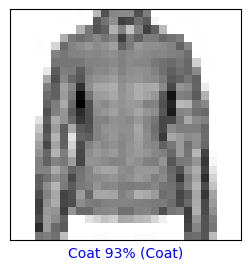

Plotting the probability distribution of the image

1/1 [==============================] - 0s 64ms/step


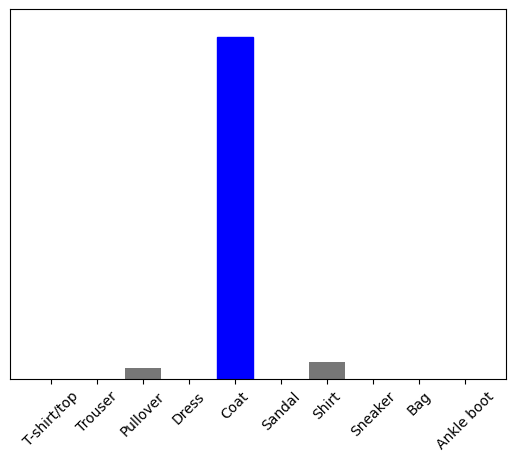

Class label: 4


Images in this batch:


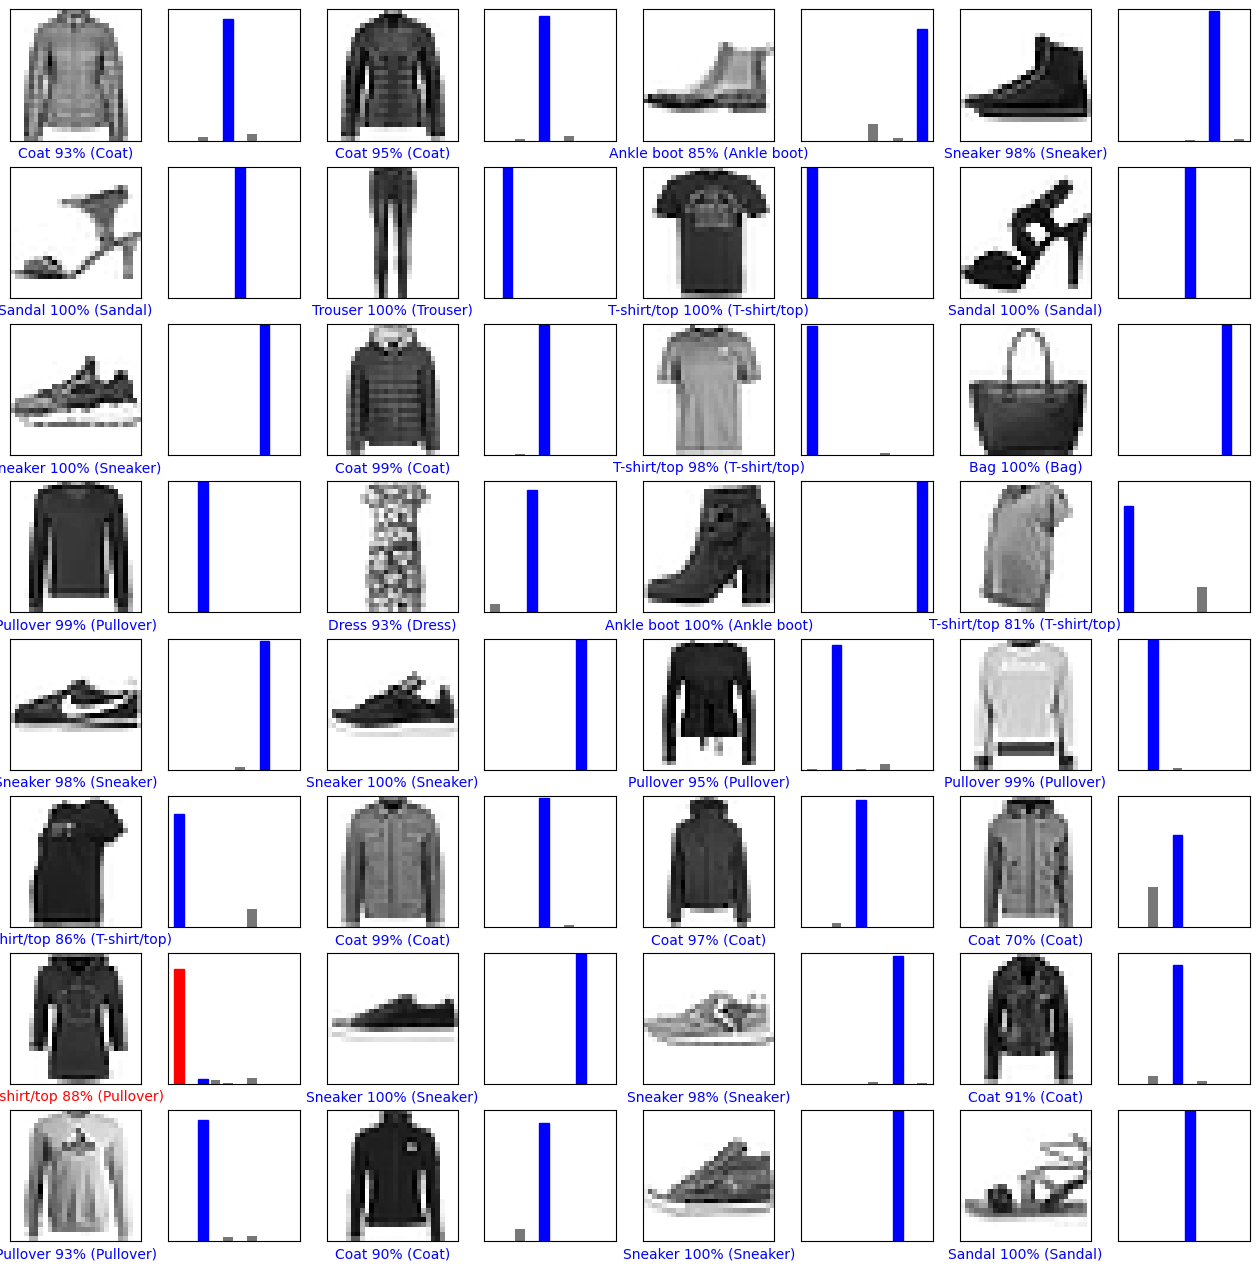

In [21]:
Batch_test_images(1)

## 12th batch

1/1 [==============================] - 0s 16ms/step


The prediction array: [5.9447488e-16 4.3578938e-22 2.8100479e-18 1.4206168e-19 5.1729344e-15
 2.7168468e-18 8.4245470e-14 2.1218092e-16 9.9999994e-01 7.1193508e-18]


Using argmax, the class label should be :8


Test label in the test dataset: 8


The class name 8 is Bag


Plotting the first image of the batch 12



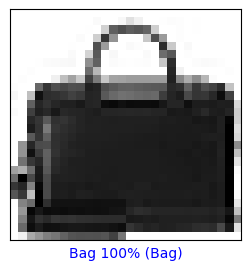

Plotting the probability distribution of the image

1/1 [==============================] - 0s 21ms/step


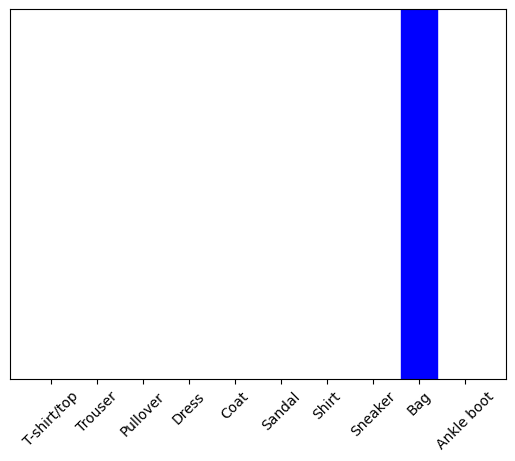

Class label: 8


Images in this batch:


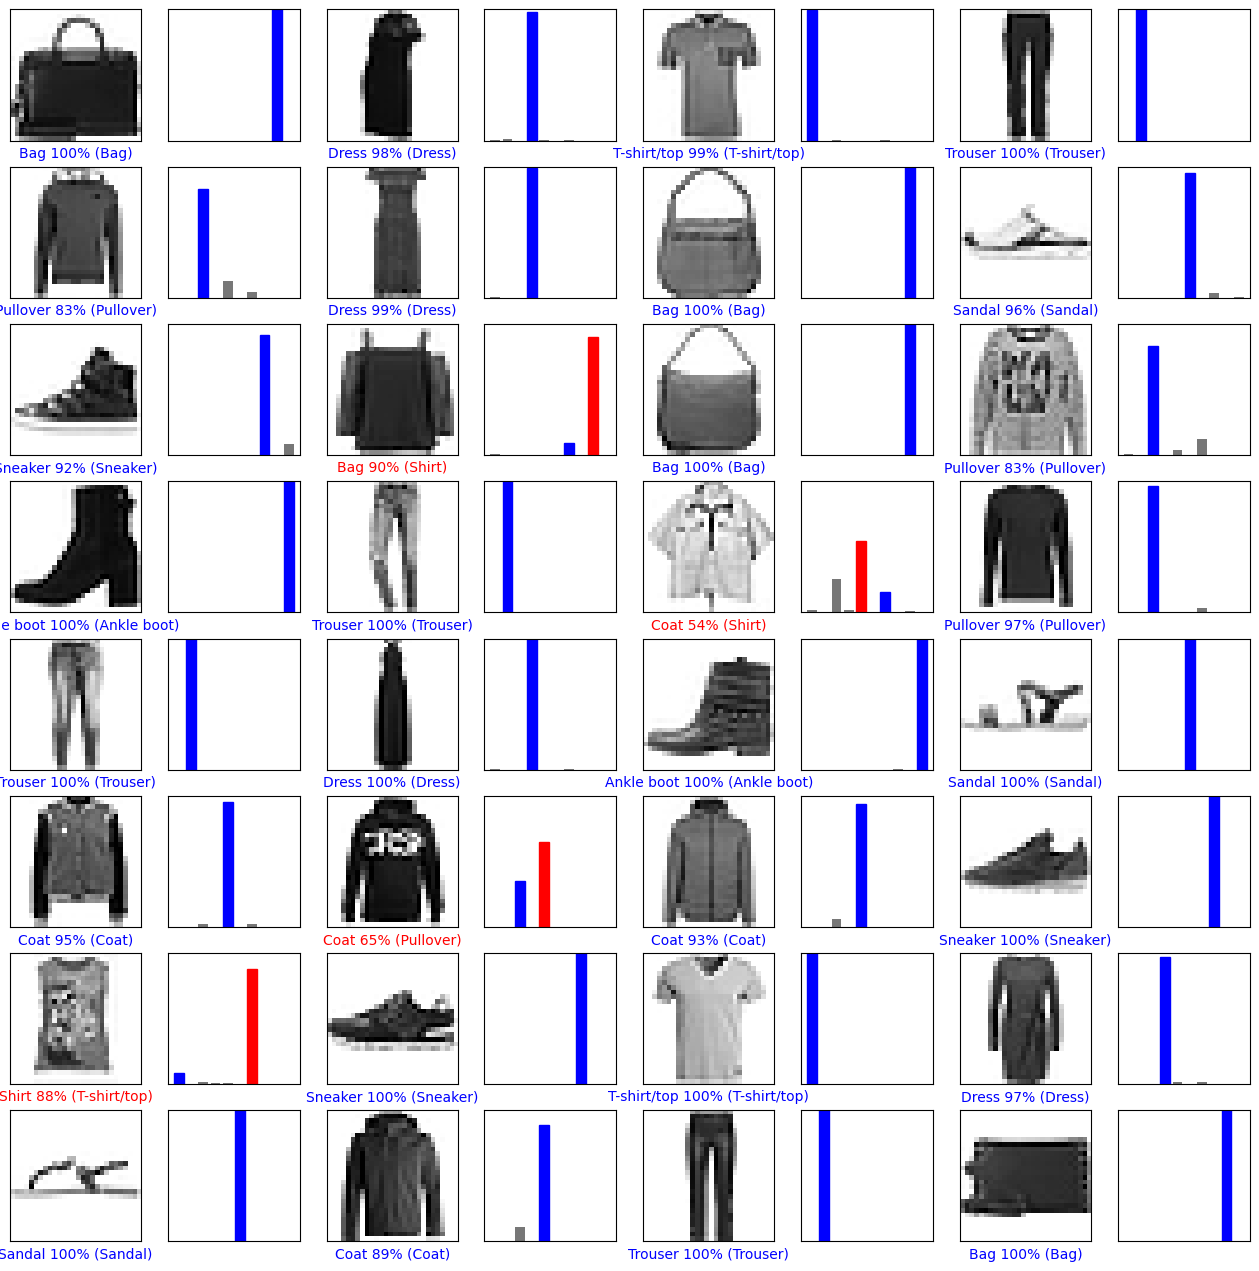

In [22]:
Batch_test_images(12)

## 313th batch

The total number of batches in the test dataset are 313,
out of which only 312 batches have batch size of 32 images, and batch no. 313 have 16 images


1/1 [==============================] - 0s 20ms/step


The prediction array: [2.55992659e-03 1.08937085e-04 2.35956572e-02 6.67338133e-01
 2.03605831e-01 4.54306837e-06 1.02473870e-01 1.80504105e-06
 3.08661984e-04 2.66289385e-06]


Using argmax, the class label should be :3


Test label in the test dataset: 3


The class name 3 is Dress


Plotting the first image of the batch 313



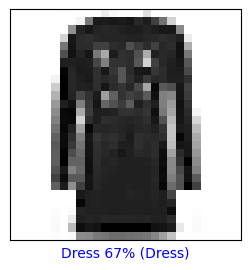

Plotting the probability distribution of the image

1/1 [==============================] - 0s 21ms/step


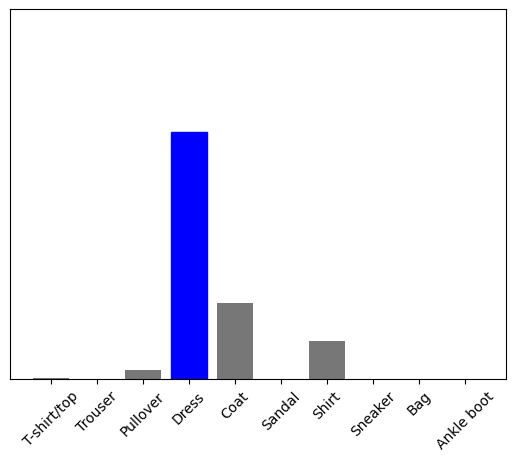

Class label: 3


Images in this batch:


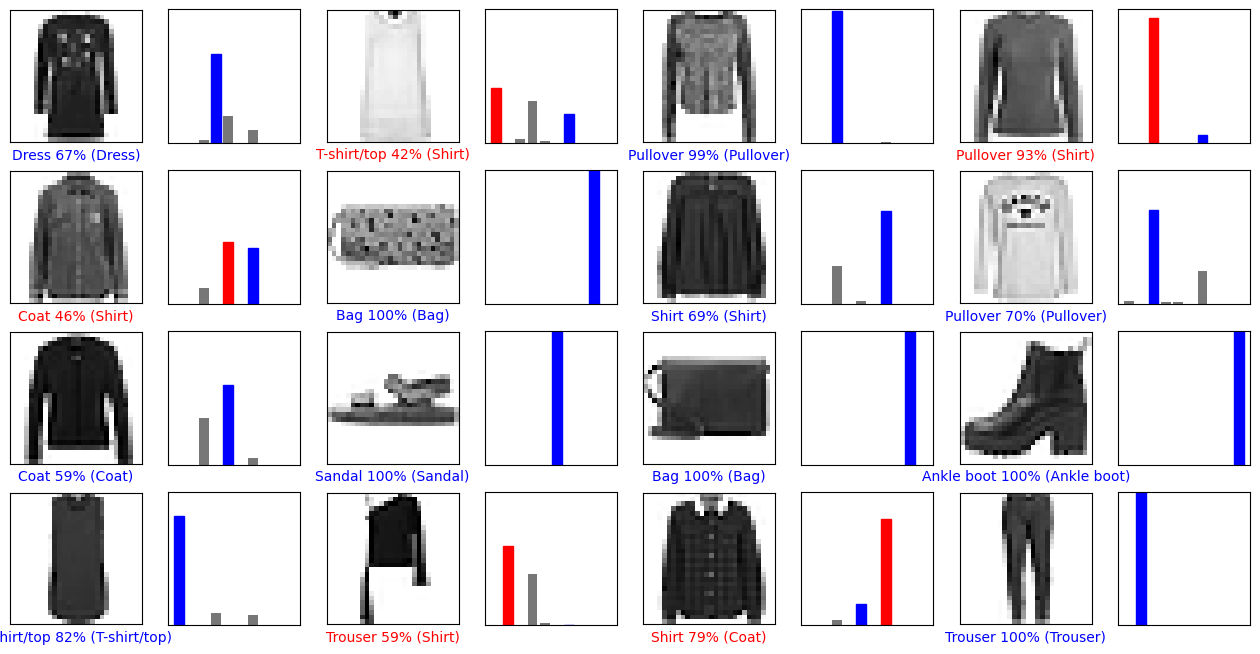

In [23]:
Batch_test_images(313)

## 315th batch

In [24]:
Batch_test_images(315)

Batch number not available in the test dataset!


## Conclusion:
* We were able to classify test dataset from the model trained on train dataset with train accuracy 91.4% and test accuracy 89%.
* There were 313 batches in the test dataset, as total number of examples in the test dataset were 10,000. The batch size was 32, and only 312 batches were able to take 32 batch size. While, 313th batch took 16 batch size. 